<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

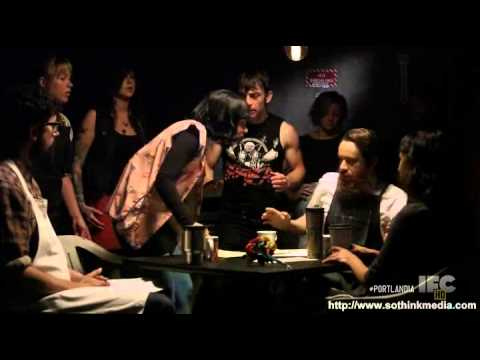

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\Elina\\Documents\\GitHub\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [79]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [80]:
shops['star_rating'] = shops['star_rating'].str.split()

In [81]:
ratings = [rating[0] for rating in shops['star_rating']]

In [82]:
shops['star_rating'] = [float(rating) for rating in ratings]

shops['star_rating'].value_counts()

5.0    3780
4.0    2360
3.0     738
2.0     460
1.0     278
Name: star_rating, dtype: int64

In [83]:
import re

pattern = r'(\d+\/\d+\/\d{4} )'

pattern2 = r'(\d check-ins? )'

dates = shops['full_review_text'].str.extract(pattern)

check_ins = shops['full_review_text'].str.extract(pattern2)

shops['full_review_text'] = shops['full_review_text'].str.replace(pattern, "").str.replace(pattern2, "").str.strip()

shops['full_review_text']

0       Love love loved the atmosphere! Every corner o...
1       Listed in Date Night: Austin, Ambiance in Aust...
2       Listed in Brunch Spots I loved the eclectic an...
3       Very cool decor! Good drinks Nice seating  How...
4       They are located within the Northcross mall sh...
5       Very cute cafe! I think from the moment I step...
6       Listed in "Nuptial Coffee Bliss!", Anderson La...
7       Love this place!  5 stars for cleanliness 5 st...
8       Ok, let's try this approach...  Pros: Music Se...
9       This place has been shown on my social media f...
10      Listed in Americano This is not your average c...
11      The store has A+ decoration, but honestly, the...
12      Listed in 2016 - The Third Time is a Charm! Th...
13      This is such a cute little cafe! I've driven b...
14      Beautiful eccentric coffee shop with a library...
15      Listed in In Search of Fantastic Coffee So, I ...
16      Really love the atmosphere here! I frequent co...
17      Check 

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [84]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [89]:
# Tokenizer Pipe
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = []
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)

shops['review_tokens'] = tokens

In [90]:
shops['review_tokens'].head()

0    [love, love, loved, atmosphere!, corner, coffe...
1    [listed, date, night:, austin,, ambiance, aust...
2    [listed, brunch, spots, loved, eclectic, homey...
3    [cool, decor!, good, drinks, nice, seating,  ,...
4    [located, northcross, mall, shopping, center, ...
Name: review_tokens, dtype: object

In [92]:
from collections import Counter
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [94]:
wc = count(shops['review_tokens'])
wc.head(30)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
25,,4343,14990,1.0,0.037413,0.037413,0.570247
12,coffee,4210,8058,2.0,0.020111,0.057524,0.552784
135,place,3029,4264,3.0,0.010642,0.068166,0.397715
97,great,2434,3243,4.0,0.008094,0.076260,0.319590
275,it's,2061,3117,5.0,0.007780,0.084040,0.270614
180,like,2034,2902,6.0,0.007243,0.091283,0.267069
160,good,2084,2779,7.0,0.006936,0.098218,0.273634
23,love,1431,1802,8.0,0.004497,0.102716,0.187894
337,i'm,1382,1797,9.0,0.004485,0.107201,0.181460
785,little,1230,1479,10.0,0.003691,0.110892,0.161502


In [113]:
# Add Stopwords
STOP_WORDS = nlp.Defaults.stop_words.union([' ','coffee', 'place', "it's", "i've", 'it', 
                                            'it.', 'coffee.', 'this', 'got', 'coffee,', 
                                            '-', "i'm", "iced", 'latte', 'tea', 'austin',
                                           "you're"])

In [114]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['review_tokens'] = tokens

In [115]:
wc = count(shops['review_tokens'])
wc.head(30)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
92,great,2434,3243,1.0,0.009015,0.009015,0.319590
173,like,2034,2902,2.0,0.008067,0.017081,0.267069
153,good,2084,2779,3.0,0.007725,0.024806,0.273634
20,love,1431,1802,4.0,0.005009,0.029815,0.187894
775,little,1230,1479,5.0,0.004111,0.033926,0.161502
339,don't,1133,1395,6.0,0.003878,0.037804,0.148766
157,nice,1188,1368,7.0,0.003803,0.041606,0.155987
383,food,1092,1363,8.0,0.003789,0.045395,0.143382
587,time,1099,1345,9.0,0.003739,0.049134,0.144301
23,pretty,1066,1339,10.0,0.003722,0.052856,0.139968


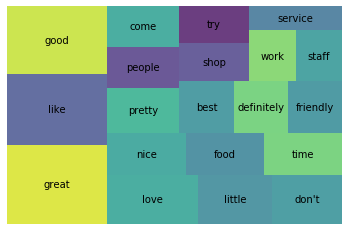

In [116]:
# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [126]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.text.lower() not in STOP_WORDS) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas



In [127]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [128]:
shops['lemmas'].head()

0    [love, love, love, atmosphere, corner, shop, s...
1    [list, Date, Night, Ambiance, beautiful, love,...
2    [list, Brunch, Spots, love, eclectic, homey, p...
3    [cool, decor, good, drink, nice, seating, over...
4    [locate, Northcross, mall, shopping, center, f...
Name: lemmas, dtype: object

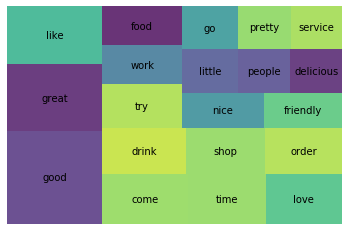

In [129]:
wc = count(shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [130]:
cond = shops['star_rating'] >= 4.0
good = shops[cond]
bad = shops[~cond]

In [131]:
wc_good = count(good['lemmas'])
wc_bad = count(bad['lemmas'])

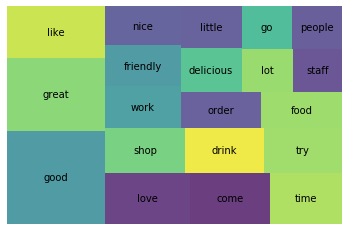

In [132]:
wc_top20 = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

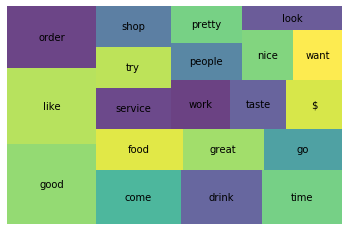

In [133]:
wc_top20 = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

